# Generate trajectory for a given item list

In [6]:
import jax
import json
from text2traj2text.retail_env.core.layout import Layout
from text2traj2text.retail_env.movement_planner.movement_planner import MovementPlanner
from text2traj2text.retail_env.planner.planner import Planner
import csv

from text2traj2text.retail_env.viz.render_image import render
from text2traj2text.retail_env.viz.render_gif import render_gif, render_partial_view_gif

seed = 0
item_list = ["Toilet Paper", "Luxury Apples", "Premium Mango", "Organic Kiwi", "Premium Papaya", "Salt", "Organic Milk", "Luxury Butter", "Luxury Yogurt", "Luxury Asparagus", "Luxury Mushrooms", "Luxury Broccoli", "Tomatoes", "Cucumbers", "High-end Green Tea"]
purchase_consideration = 2

In [2]:
with open("../../data/super-market/floor_plan/order_X.json", "r") as f:
    order = json.load(f)
with open("../../data/super-market/floor_plan/X.csv", "r") as f:
    reader = csv.reader(f)
    floor_map = [row for row in reader]

layout = Layout.from_floor_map_and_item_order(floor_map, order)
combined_planner = MovementPlanner(layout=layout, prm_args={"num_samples": 400}, dwa_args={"max_steps": 100})

In [4]:
planner = Planner(layout)

In [7]:
planner = Planner(layout, prm_args={"num_samples": 400})
category_priority = planner.update_category_priority(jax.random.PRNGKey(seed), purchase_consideration)

traj, path = planner._generate_trajectory(jax.random.PRNGKey(0),item_list, category_priority)

render(layout, traj)

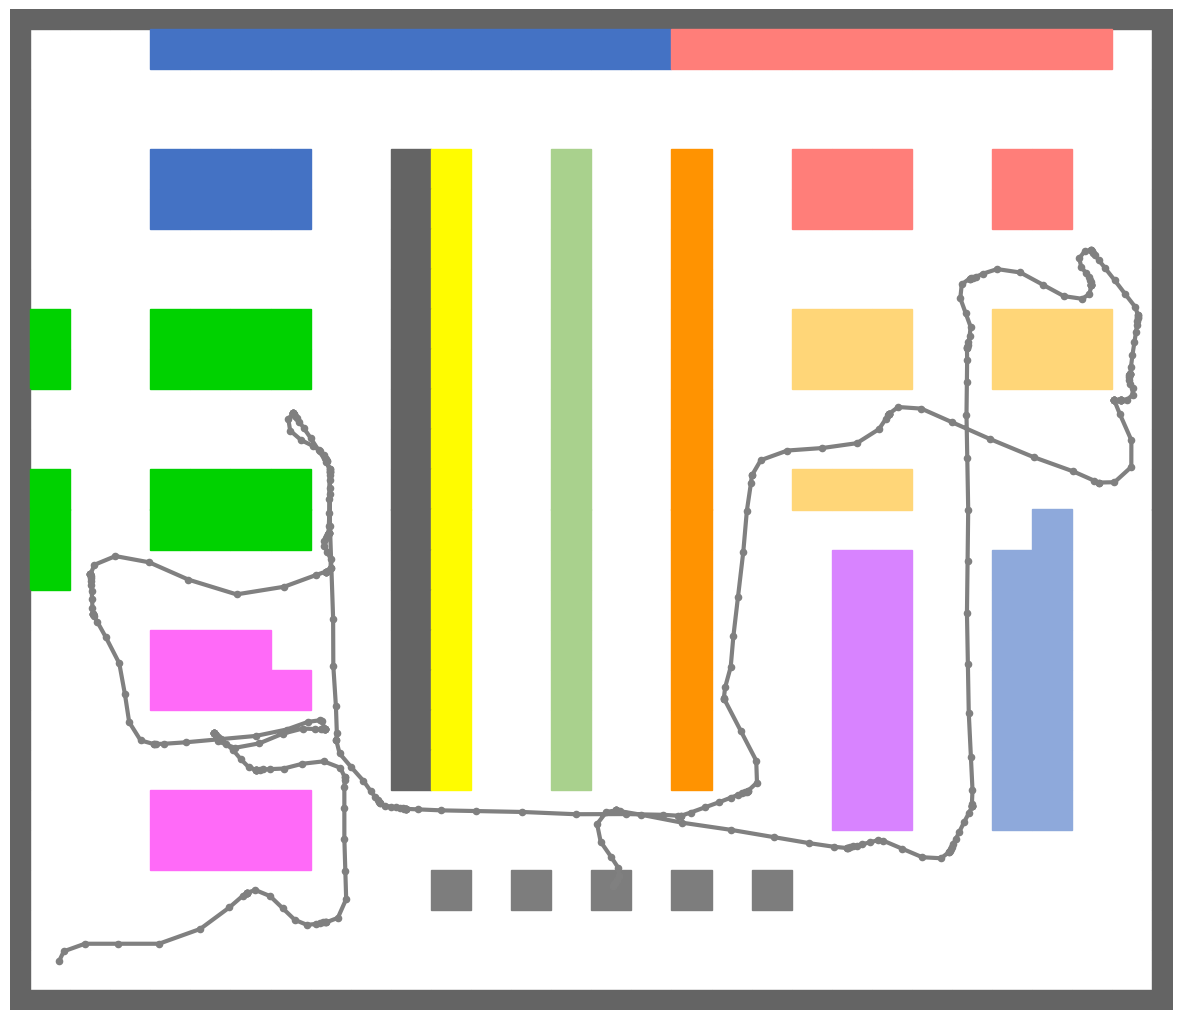

In [8]:
render_gif(layout, traj)

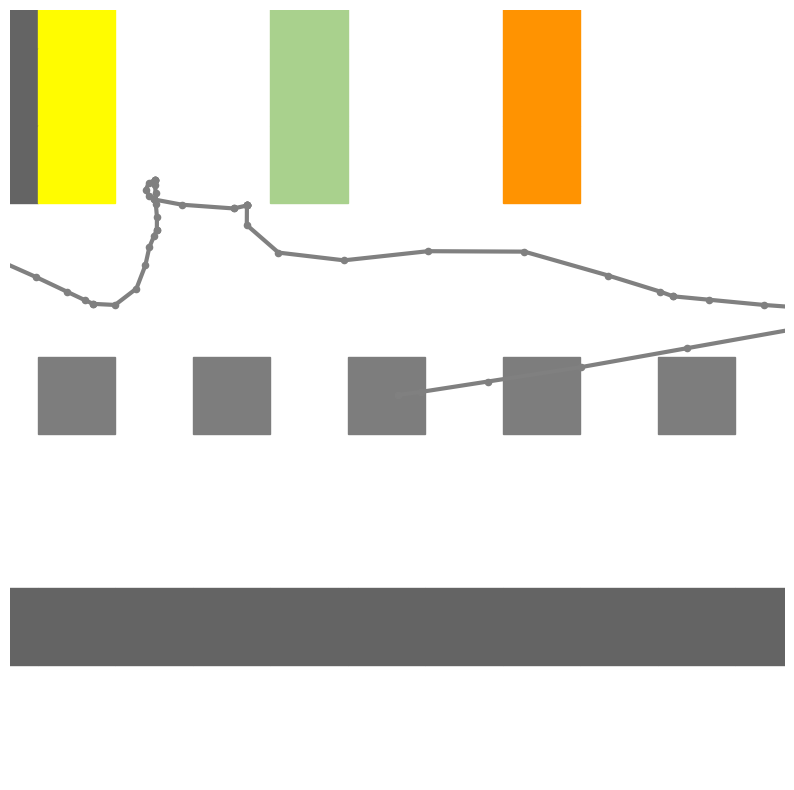

In [6]:
render_partial_view_gif(layout, traj)